## Fashion MNIST 데이터셋 - CNN 망 훈련하기

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model

#### Conv2D 적용

In [4]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(4, kernel_size=3, strides=1, padding="same", activation ="relu")(input_tensor)

In [5]:
x

<KerasTensor: shape=(None, 28, 28, 4) dtype=float32 (created by layer 'conv2d')>

#### Pooling 적용

In [6]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(4, kernel_size=3, strides=1, padding="same", activation ="relu")(input_tensor)
x = MaxPooling2D(pool_size=2)(x)

In [7]:
x

<KerasTensor: shape=(None, 14, 14, 4) dtype=float32 (created by layer 'max_pooling2d')>

#### CNN 모델 생성

In [8]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")(input_tensor)
x = Conv2D(filters=64, kernel_size=3, strides=1, padding="valid", activation="relu")(x)
output = MaxPooling2D(2)(x)

model = Model(inputs=input_tensor, outputs=output)

In [26]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


#### 데이터 적재, 전처리

In [9]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = np.array(train_images/255.0, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_images = np.array(test_images/255.0, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

4431872/4422102 [==============================] - 0s 0us/step


#### 모델 생성

In [11]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")(input_tensor)
x = Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu")(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dense(100, activation="relu")(x)
output = Dense(10, activation="softmax")(x)

model = Model(inputs=input_tensor, outputs=output)

In [12]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1254500   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010

In [14]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=128, epochs=30, validation_split=0.2)

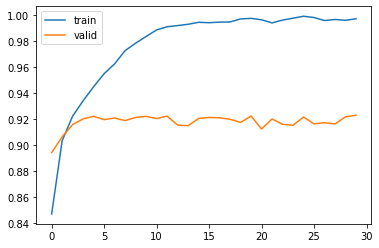

In [17]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

In [18]:
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 1s 11ms/step - loss: 0.6037 - accuracy: 0.9172


[0.6037285923957825, 0.9172000288963318]

#### DropOut 적용

In [20]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")(input_tensor)
x = Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu")(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation="relu")(x)
output = Dense(10, activation="softmax")(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout (Dropout)            (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1254

In [21]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 7s 18ms/step - loss: 0.4524 - accuracy: 0.8382 - val_loss: 0.3226 - val_accuracy: 0.8832
Epoch 2/30
375/375 [==============================] - 6s 17ms/step - loss: 0.3004 - accuracy: 0.8914 - val_loss: 0.2732 - val_accuracy: 0.9015
Epoch 3/30
375/375 [==============================] - 6s 17ms/step - loss: 0.2491 - accuracy: 0.9093 - val_loss: 0.2478 - val_accuracy: 0.9080
Epoch 4/30
375/375 [==============================] - 6s 17ms/step - loss: 0.2208 - accuracy: 0.9186 - val_loss: 0.2351 - val_accuracy: 0.9155
Epoch 5/30
375/375 [==============================] - 6s 17ms/step - loss: 0.1949 - accuracy: 0.9278 - val_loss: 0.2197 - val_accuracy: 0.9201
Epoch 6/30
375/375 [==============================] - 6s 17ms/step - loss: 0.1716 - accuracy: 0.9369 - val_loss: 0.2296 - val_accuracy: 0.9176
Epoch 7/30
375/375 [==============================] - 6s 17ms/step - loss: 0.1541 - accuracy: 0.9432 - val_loss: 0.2225 - val_accuracy: 0.9197

In [22]:
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 11ms/step - loss: 0.3806 - accuracy: 0.9228


[0.38056984543800354, 0.9228000044822693]

In [31]:
tf.keras.backend.clear_session()

input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")(input_tensor)
x = Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu")(x)
x = MaxPooling2D(2)(x)

x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation="relu")(x)
x = Dropout(rate=0.2)(x)
x = Dense(100, activation="relu")(x)
x = Dropout(rate=0.2)(x)
output = Dense(10, activation="softmax")(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dropout (Dropout)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 200)               250900

In [28]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=train_images, y=train_oh_labels, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 8s 19ms/step - loss: 0.5069 - accuracy: 0.8173 - val_loss: 0.3092 - val_accuracy: 0.8878
Epoch 2/30
375/375 [==============================] - 7s 19ms/step - loss: 0.3222 - accuracy: 0.8843 - val_loss: 0.2642 - val_accuracy: 0.9001
Epoch 3/30
375/375 [==============================] - 7s 19ms/step - loss: 0.2689 - accuracy: 0.9022 - val_loss: 0.2492 - val_accuracy: 0.9059
Epoch 4/30
375/375 [==============================] - 7s 19ms/step - loss: 0.2380 - accuracy: 0.9127 - val_loss: 0.2203 - val_accuracy: 0.9197
Epoch 5/30
375/375 [==============================] - 7s 19ms/step - loss: 0.2097 - accuracy: 0.9226 - val_loss: 0.2225 - val_accuracy: 0.9173
Epoch 6/30
375/375 [==============================] - 7s 19ms/step - loss: 0.1893 - accuracy: 0.9303 - val_loss: 0.2130 - val_accuracy: 0.9241
Epoch 7/30
375/375 [==============================] - 7s 19ms/step - loss: 0.1718 - accuracy: 0.9378 - val_loss: 0.1993 - val_accuracy: 0.9298

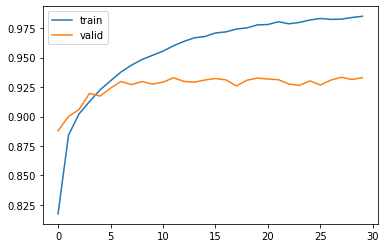

In [29]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

In [30]:
model.evaluate(test_images, test_oh_labels, batch_size=256, verbose=1)

40/40 [==============================] - 0s 12ms/step - loss: 0.3040 - accuracy: 0.9287


[0.30402642488479614, 0.9286999702453613]